In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import preReq

In [2]:
df = pd.read_csv('../penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            150 non-null    object 
 1   bill_length_mm     150 non-null    float64
 2   bill_depth_mm      150 non-null    float64
 3   flipper_length_mm  150 non-null    int64  
 4   gender             144 non-null    object 
 5   body_mass_g        150 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 7.2+ KB


In [3]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
scaled_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df.iloc[:, 1:]), columns=df.iloc[:, 1:].columns)
scaled_df['species'] = df['species']
scaled_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,species
0,0.196078,0.666667,0.155172,0.5,0.291667,Adelie
1,0.211765,0.511905,0.241379,0.0,0.305556,Adelie
2,0.243137,0.583333,0.396552,0.0,0.152778,Adelie
3,0.215686,0.547619,0.241379,0.0,0.222222,Adelie
4,0.101961,0.738095,0.362069,0.0,0.208333,Adelie
...,...,...,...,...,...,...
145,0.654902,0.642857,0.500000,0.5,0.486111,Chinstrap
146,0.627451,0.571429,0.310345,0.0,0.194444,Chinstrap
147,0.584314,0.773810,0.689655,0.5,0.444444,Chinstrap
148,0.682353,0.666667,0.258621,0.5,0.152778,Chinstrap


In [4]:
selectedF = (preReq.INarr[0], preReq.INarr[1])
selectedC = (preReq.INarr[2], preReq.INarr[3])
weight = np.random.random((2))
eta = preReq.INarr[4]
epochs = preReq.INarr[5]
bias = np.random.randn() if preReq.INarr[6] else 0

---
# Visualizations

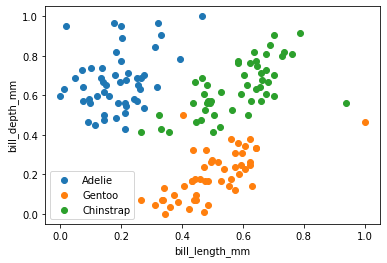

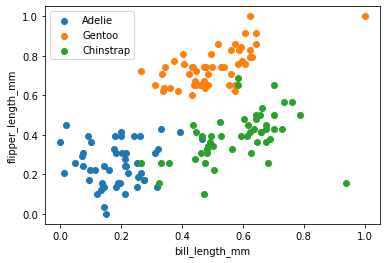

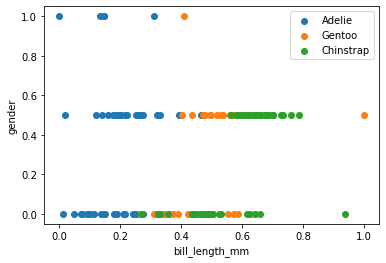

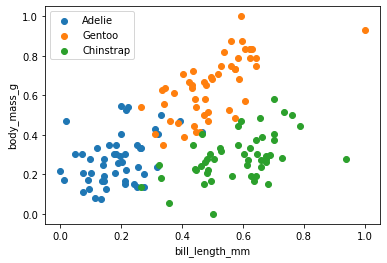

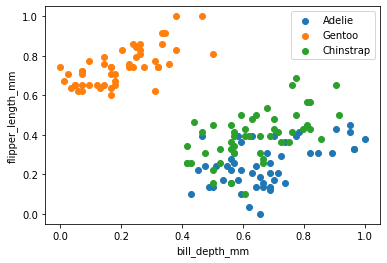

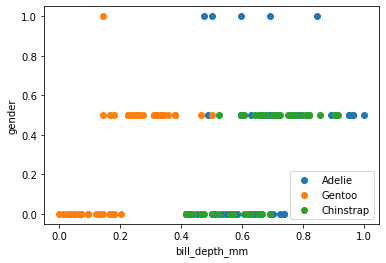

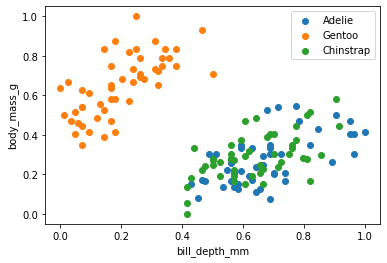

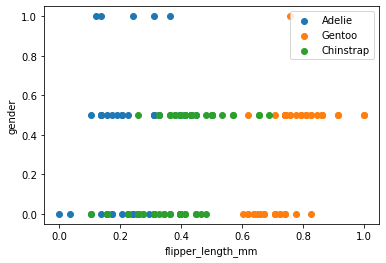

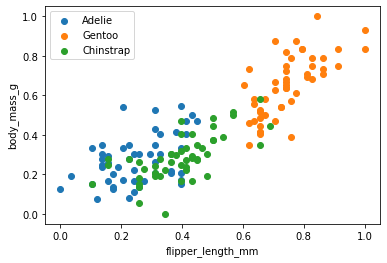

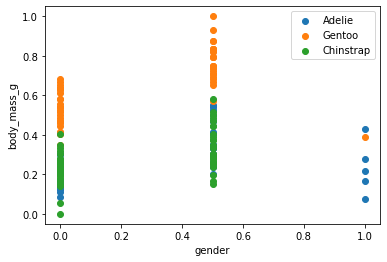

In [5]:
def visualizeData(scaled_df):  # 10 combs
    import matplotlib.pyplot as plt

    for i in range(len(preReq.Features) - 1):
        for j in range(i + 1, len(preReq.Features)):
            fL1, fL2 = preReq.Features[i], preReq.Features[j]
            f1, f2 = scaled_df[fL1], scaled_df[fL2]

            plt.xlabel(fL1)
            plt.ylabel(fL2)

            CF = [(f1[:50], f2[:50]), (f1[50:100], f2[50:100]), (f1[100:], f2[100:])]
            for plot in range(3):
                plt.scatter(CF[plot][0], CF[plot][1])

            plt.legend([preReq.Classes[0], preReq.Classes[1], preReq.Classes[2]])
            plt.show()


visualizeData(scaled_df)

---
# Main

In [6]:
misClass = list()
for x in preReq.Classes:
    if x not in selectedC:
        misClass.append(x)

misFeatures = list()
for x in preReq.Features:
    if x not in selectedF:
        misFeatures.append(x)

In [7]:
scaled_df.drop(scaled_df.index[(scaled_df["species"] == misClass[0])], axis=0, inplace=True)
scaled_df.drop(columns=misFeatures, axis=1, inplace=True)
scaled_df['species'] = scaled_df['species'].replace(selectedC, [1, -1])
scaled_df

,bill_length_mm,body_mass_g,species
50,0.470588,0.500000,1
51,0.623529,0.833333,1
52,0.572549,0.486111,1
53,0.623529,0.833333,1
54,0.529412,0.750000,1
...,...,...,...
145,0.654902,0.486111,-1
146,0.627451,0.194444,-1
147,0.584314,0.444444,-1
148,0.682353,0.152778,-1


In [8]:
C1, C2 = (scaled_df[:50]).sample(frac=1), (scaled_df[50:100]).sample(frac=1)
C1_train, C1_test, C2_train, C2_test = C1[:30], C1[30:], C2[:30], C2[30:]

all_train_data = pd.concat([C1_train, C2_train]).to_numpy()
all_test_data = pd.concat([C1_test, C2_test]).to_numpy()

train_data, train_target = all_train_data[:, :2], all_train_data[:, 2:]
test_data, test_target = all_test_data[:, :2], all_test_data[:, 2:]

In [9]:
def PerceptronAlgo(epochs, weight, bias, eta, train_data, train_target):
    import numpy as np

    for epoch in range(epochs):
        predict = (train_data.dot(weight.transpose()) + bias)
        yPredTrain = np.where(predict > 0, 1, -1)
        for i in range(len(train_target)):
            if yPredTrain[i] != train_target[i]:
                loss = train_target[i] - yPredTrain[i]
                weight += (eta * loss * train_data[i])
                bias += (eta * loss) if bias else 0
    return yPredTrain

yPredTrain = PerceptronAlgo(epochs, weight, bias, eta, train_data, train_target)
yPredTrain

array([ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])

---
# Testing

In [10]:
ytest = (test_data.dot(weight.transpose()) + bias)
yPredTest = np.where(ytest>0, 1, -1)
yPredTest

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [11]:
def ConfuionMatrix(target, yPred):
    import numpy as np
    import pandas as pd

    testCase = list()
    confMat = np.zeros([2, 2])

    for i in range(len(yPred)):
        if target[i] == 1:
            if yPred[i] == 1:
                confMat[0][0] += 1
                testCase.append([int(target[i][0]), yPred[i], '[*]'])
            else:
                confMat[0][1] += 1
                testCase.append([int(target[i][0]), yPred[i], '[ ]'])

        elif target[i] == -1:
            if yPred[i] == -1:
                confMat[1][1] += 1
                testCase.append([int(target[i][0]), yPred[i], '[*]'])
            else:
                confMat[1][0] += 1
                testCase.append([int(target[i][0]), yPred[i], '[ ]'])

    Cases = pd.DataFrame(testCase, columns=['Real', 'Pred', 'Match'])
    return ((np.trace(confMat) / np.sum(confMat)) * 100), confMat, pd.DataFrame(Cases, columns=['Real', 'Pred', 'Match'])

In [12]:
preReq.OUTarr[1], confMatTrain, truthValsTrain = ConfuionMatrix(train_target, yPredTrain)
print('|> Truth Values for Training <|\n   Training Accuracy: ', preReq.OUTarr[1], '%\n', truthValsTrain, '\n', '-' * 35)

preReq.OUTarr[2], confMatTest, truthValsTest = ConfuionMatrix(test_target, yPredTest)
print('|> Truth Values for Testing <|\n   Testing Accuracy: ', preReq.OUTarr[2], '%\n', truthValsTest, '\n', '-' * 35)

|> Truth Values for Training <|
   Training Accuracy:  91.66666666666666 %
     Real  Pred Match
0      1     1   [*]
1      1     1   [*]
2      1     1   [*]
3      1     1   [*]
4      1     1   [*]
5      1    -1   [ ]
6      1    -1   [ ]
7      1     1   [*]
8      1    -1   [ ]
9      1     1   [*]
10     1     1   [*]
11     1     1   [*]
12     1     1   [*]
13     1     1   [*]
14     1     1   [*]
15     1     1   [*]
16     1     1   [*]
17     1     1   [*]
18     1     1   [*]
19     1     1   [*]
20     1     1   [*]
21     1     1   [*]
22     1     1   [*]
23     1     1   [*]
24     1    -1   [ ]
25     1    -1   [ ]
26     1     1   [*]
27     1     1   [*]
28     1     1   [*]
29     1     1   [*]
30    -1    -1   [*]
31    -1    -1   [*]
32    -1    -1   [*]
33    -1    -1   [*]
34    -1    -1   [*]
35    -1    -1   [*]
36    -1    -1   [*]
37    -1    -1   [*]
38    -1    -1   [*]
39    -1    -1   [*]
40    -1    -1   [*]
41    -1    -1   [*]
42    -1    -1   [*]


In [13]:
preReq.OUTarr[0] = selectedC[0] if sum(yPredTest) else selectedC[1]
preReq.OUTarr[3][0] = confMatTest[0][0]
preReq.OUTarr[3][1] = confMatTest[0][1]
preReq.OUTarr[3][2] = confMatTest[1][0]
preReq.OUTarr[3][3] = confMatTest[1][1]